## Objective in this notebook is to read the needed .csv's into pandas dfs

In [128]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("properties_2017_view.csv")
df2 = pd.read_csv("predictions_2017_view.csv")





In [75]:
# check to see that the csv's were read

df1.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0,10754147,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016,9.0,NaN,NaN,NaN,NaN
1,1,10759547,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,2,10843547,NaN,NaN,NaN,0.0,0,5.0,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016,774261.0,20800.37,NaN,NaN,NaN
3,3,10859147,NaN,NaN,NaN,0.0,0,3.0,6.0,NaN,...,1.0,NaN,580059.0,1174475.0,2016,594416.0,14557.57,NaN,NaN,NaN
4,4,10879947,NaN,NaN,NaN,0.0,0,4.0,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016,243350.0,5725.17,NaN,NaN,NaN


In [76]:
df2.head()

,id,parcelid,logerror,transactiondate
0,0,14297519,0.025595,2017-01-01
1,1,17052889,0.055619,2017-01-01
2,2,14186244,0.005383,2017-01-01
3,3,12177905,-0.103410,2017-01-01
4,4,10887214,0.006940,2017-01-01


### But df1's got 59 columns!  Way too many.  Use what I need.

In [77]:
clean_df1 = pd.read_csv("properties_2017_view.csv", usecols=["bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet", "fips", "taxvaluedollarcnt", "taxamount"])
clean_df1.head()

# So that you don't have to scroll all the way right, I'm choosing: 
# bathroomcnt
# bedroomcnt
# calculatedfinishedsquarefeet
# fips
# taxvaluedollarcnt
# taxamount

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,taxvaluedollarcnt,taxamount
0,0.0,0,NaN,6037,9.0,NaN
1,0.0,0,NaN,6037,27516.0,NaN
2,0.0,0,73026.0,6037,1434941.0,20800.37
3,0.0,0,5068.0,6037,1174475.0,14557.57
4,0.0,0,1776.0,6037,440101.0,5725.17


In [89]:
clean_df1.shape

(1000, 6)

### Similarly, I don't need logerror from df2:

In [64]:
clean_df2 = pd.read_csv("predictions_2017_view.csv", usecols=["id", "parcelid", "transactiondate"])
clean_df2.head()

,id,parcelid,transactiondate
0,0,14297519,2017-01-01
1,1,17052889,2017-01-01
2,2,14186244,2017-01-01
3,3,12177905,2017-01-01
4,4,10887214,2017-01-01


In [90]:
clean_df2.shape

(1000, 3)

### Combining the dataframes

In [78]:
frames = [clean_df1, clean_df2]
df = pd.concat(frames, sort=True)

#### Make sure they combined:

In [80]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,id,parcelid,taxamount,taxvaluedollarcnt,transactiondate
0,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,9.0,NaN
1,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,27516.0,NaN
2,0.0,0.0,73026.0,6037.0,NaN,NaN,20800.37,1434941.0,NaN
3,0.0,0.0,5068.0,6037.0,NaN,NaN,14557.57,1174475.0,NaN
4,0.0,0.0,1776.0,6037.0,NaN,NaN,5725.17,440101.0,NaN


#### Now to translate the fips numbers into actual locations


In [82]:
df['county_name'] = df.fips.map({6037: 'Los Angeles', 
                                        6059: 'Orange',
                                        6111: 'Ventura'})

In [83]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,id,parcelid,taxamount,taxvaluedollarcnt,transactiondate,county_name
0,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,9.0,NaN,Los Angeles
1,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,27516.0,NaN,Los Angeles
2,0.0,0.0,73026.0,6037.0,NaN,NaN,20800.37,1434941.0,NaN,Los Angeles
3,0.0,0.0,5068.0,6037.0,NaN,NaN,14557.57,1174475.0,NaN,Los Angeles
4,0.0,0.0,1776.0,6037.0,NaN,NaN,5725.17,440101.0,NaN,Los Angeles


In [84]:
df.drop(["bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet", "id", "parcelid"], axis=1)

,fips,taxamount,taxvaluedollarcnt,transactiondate,county_name
0,6037.0,NaN,9.0,NaN,Los Angeles
1,6037.0,NaN,27516.0,NaN,Los Angeles
2,6037.0,20800.37,1434941.0,NaN,Los Angeles
3,6037.0,14557.57,1174475.0,NaN,Los Angeles
4,6037.0,5725.17,440101.0,NaN,Los Angeles
...,...,...,...,...,...
995,NaN,NaN,NaN,2017-01-05,NaN
996,NaN,NaN,NaN,2017-01-05,NaN
997,NaN,NaN,NaN,2017-01-05,NaN
998,NaN,NaN,NaN,2017-01-05,NaN


In [85]:
df.shape

(2000, 10)

In [86]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'id', 'parcelid', 'taxamount', 'taxvaluedollarcnt', 'transactiondate',
       'county_name'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 10 columns):
bathroomcnt                     1000 non-null float64
bedroomcnt                      1000 non-null float64
calculatedfinishedsquarefeet    931 non-null float64
fips                            1000 non-null float64
id                              1000 non-null float64
parcelid                        1000 non-null float64
taxamount                       968 non-null float64
taxvaluedollarcnt               868 non-null float64
transactiondate                 1000 non-null object
county_name                     1000 non-null object
dtypes: float64(8), object(2)
memory usage: 171.9+ KB


In [88]:
df.isna().sum()

bathroomcnt                     1000
bedroomcnt                      1000
calculatedfinishedsquarefeet    1069
fips                            1000
id                              1000
parcelid                        1000
taxamount                       1032
taxvaluedollarcnt               1132
transactiondate                 1000
county_name                     1000
dtype: int64

### WHAT??  1,069 NaNs?  That's a lot of missing data.  I gotta address this...

In [51]:
df.taxvaluedollarcnt.value_counts(dropna=False)

NaN          1132
9.0             5
550000.0        3
369854.0        2
350260.0        2
             ... 
146259.0        1
382547.0        1
1092245.0       1
287396.0        1
775000.0        1
Name: taxvaluedollarcnt, Length: 846, dtype: int64

### Same thing here: 1,132 rows of missing data.

In [52]:
df.taxamount.value_counts(dropna=False)

NaN        1032
377.09        1
573.52        1
2051.26       1
5117.52       1
           ... 
742.76        1
6384.54       1
237.30        1
91.60         1
503.36        1
Name: taxamount, Length: 969, dtype: int64

### Again, over a 1,000 rows of missing data.  Time to clean up the NaN values...

In [101]:
# when combining the two dfs, the number of rows skyrocketed the number of rows doubled
# from 1,000 to 2,000, as evidenced by the df.shapes above.  

# It appears that those extra 1,000 rows were all NaN values (from value_counts), meaning
# the value_counts above can be read as 32 NaN values, instead of 1,023 NaN values.

# Find out where they are:

#1.) change the number of displayed rows from 10 to all
pd.set_option("display.max_rows", None)

#2.) tell pandas not to truncate the columns
pd.set_option("display.max_columns", None)

#3.) maximize the width to fit all data
pd.set_option("display.width", None)

#4.) keep the size of the characters readable
pd.set_option("display.max_colwidth", -1)

#print(df)

In [102]:
# Checked above (save yourself the time) to see that all the added columns were indeed NaN
# values, so reading the 1,032 NaN values from value_counts tells me there's only 32.  

# Dropping 32 columns does not seem to be detrimental to the overall data set of 1,000,
# so dropping them.

df.dropna()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,id,parcelid,taxamount,taxvaluedollarcnt,transactiondate,county_name


In [104]:
df.head(10)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,id,parcelid,taxamount,taxvaluedollarcnt,transactiondate,county_name
0,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,9.0,NaN,Los Angeles
1,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,27516.0,NaN,Los Angeles
2,0.0,0.0,73026.0,6037.0,NaN,NaN,20800.37,1434941.0,NaN,Los Angeles
3,0.0,0.0,5068.0,6037.0,NaN,NaN,14557.57,1174475.0,NaN,Los Angeles
4,0.0,0.0,1776.0,6037.0,NaN,NaN,5725.17,440101.0,NaN,Los Angeles
5,0.0,0.0,2400.0,6037.0,NaN,NaN,3661.28,287634.0,NaN,Los Angeles
6,0.0,0.0,NaN,6037.0,NaN,NaN,6773.34,563029.0,NaN,Los Angeles
7,0.0,0.0,3611.0,6037.0,NaN,NaN,7857.84,698984.0,NaN,Los Angeles
8,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,9.0,NaN,Los Angeles
9,0.0,0.0,3754.0,6037.0,NaN,NaN,4054.76,265184.0,NaN,Los Angeles


In [107]:
df.drop(["id", "parcelid", "transactiondate"], axis=1)
df.head(10)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,id,parcelid,taxamount,taxvaluedollarcnt,transactiondate,county_name
0,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,9.0,NaN,Los Angeles
1,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,27516.0,NaN,Los Angeles
2,0.0,0.0,73026.0,6037.0,NaN,NaN,20800.37,1434941.0,NaN,Los Angeles
3,0.0,0.0,5068.0,6037.0,NaN,NaN,14557.57,1174475.0,NaN,Los Angeles
4,0.0,0.0,1776.0,6037.0,NaN,NaN,5725.17,440101.0,NaN,Los Angeles
5,0.0,0.0,2400.0,6037.0,NaN,NaN,3661.28,287634.0,NaN,Los Angeles
6,0.0,0.0,NaN,6037.0,NaN,NaN,6773.34,563029.0,NaN,Los Angeles
7,0.0,0.0,3611.0,6037.0,NaN,NaN,7857.84,698984.0,NaN,Los Angeles
8,0.0,0.0,NaN,6037.0,NaN,NaN,NaN,9.0,NaN,Los Angeles
9,0.0,0.0,3754.0,6037.0,NaN,NaN,4054.76,265184.0,NaN,Los Angeles


In [119]:
new_df = df.drop(["bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet", "parcelid", "transactiondate"], axis=1)

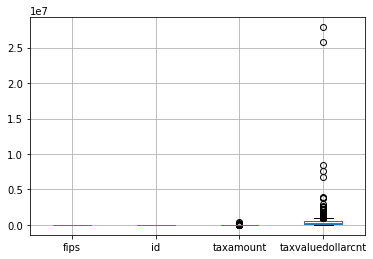

In [120]:
new_df.boxplot()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/anaconda3/lib/python3.7/site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122011450>,
      dtype=object)

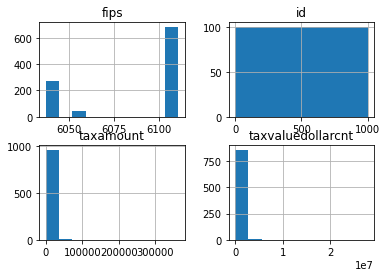

In [121]:
new_df.hist()

In [126]:
df_taxes = pd.DataFrame({"Los_Angeles_County":[1_442_766_607_000], 
                   "Orange_County":[564_233_135_000], 
                   "Ventura_County":[130_950_979_000],})

df_taxes

,Los_Angeles_County,Orange_County,Ventura_County
0,1442766607000,564233135000,130950979000


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/anaconda3/lib/python3.7/site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122757e10>,
      dtype=object)

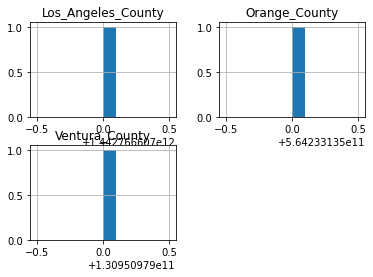

In [129]:
df_taxes.hist()